In [3]:
import cv2
from darkflow.net.build import TFNet
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'svg'

/Users/Pan/anaconda/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [4]:
# define the model options and run

options = {
    'model': 'cfg/yolov2-tiny-voc-1c.cfg',
    'load': 3000,
    'threshold': 0.3
}

tfnet = TFNet(options)

Parsing cfg/yolov2-tiny-voc-1c.cfg
Loading None ...
Finished in 8.225440979003906e-05s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 26, 26, 256)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 1

# 1. test on light condition.

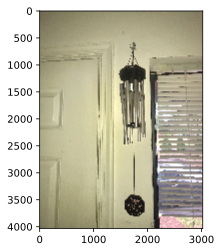

In [16]:
# read the color image and covert to RGB

img = cv2.imread('new_model_data/test/my_wind_chime_light.jpg', cv2.IMREAD_COLOR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# use YOLO to predict the image
result = tfnet.return_predict(img)

plt.imshow(img)
plt.show()

In [17]:
result[0]

{'label': 'wind_chime',
 'confidence': 0.5028645,
 'topleft': {'x': 1396, 'y': 386},
 'bottomright': {'x': 2055, 'y': 4031}}

In [18]:
img.shape

(4032, 3024, 3)

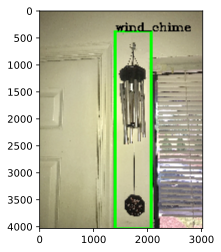

In [19]:
# pull out some info from the results# pull o 

tl = (result[0]['topleft']['x'], result[0]['topleft']['y'])
br = (result[0]['bottomright']['x'], result[0]['bottomright']['y'])
label = result[0]['label']


# add the box and label and display it
img = cv2.rectangle(img, tl, br, (0, 255, 0), 50)
img = cv2.putText(img, label, tl, cv2.FONT_HERSHEY_COMPLEX, 7, (0, 0, 0), 20)
plt.imshow(img)
plt.show()

# 2. Test on dark condition
lower confidence. but still able to detect the wind chime.

In [20]:
img = cv2.imread('new_model_data/test/my_wind_chime.jpg', cv2.IMREAD_COLOR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# use YOLO to predict the image
result = tfnet.return_predict(img)
result[0]

{'label': 'wind_chime',
 'confidence': 0.3708024,
 'topleft': {'x': 1367, 'y': 240},
 'bottomright': {'x': 2129, 'y': 3790}}

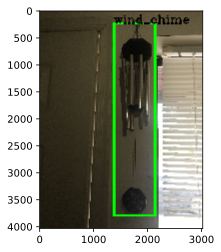

In [21]:
# pull out some info from the results# pull o 

tl = (result[0]['topleft']['x'], result[0]['topleft']['y'])
br = (result[0]['bottomright']['x'], result[0]['bottomright']['y'])
label = result[0]['label']


# add the box and label and display it
img = cv2.rectangle(img, tl, br, (0, 255, 0), 50)
img = cv2.putText(img, label, tl, cv2.FONT_HERSHEY_COMPLEX, 7, (0, 0, 0), 20)
plt.imshow(img)
plt.show()